# Ejercicios Graphs, Paths & Components

Ejercicios básicos de Grafos.

## Ejercicio - Número de Nodos y Enlaces

(resuelva en código propio y usando la librería NerworkX o iGraph)

Cuente en número de nodos y enalces con los siguientes links (asumiendo que el grafo puede ser dirigido y no dirigido)


In [1]:
edges = set([(1, 2), (3, 1), (3, 2), (2, 4)])

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

### Usando la libreria

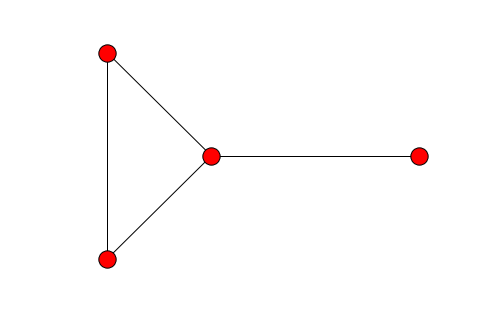

('The graph is directed?: ', False)
('Number of edges: ', 8)
('Number of nodes: ', 4)


In [54]:
gr = nx.Graph()
for i in range(1,5):
    gr.add_node(i)
for i in edges:
    gr.add_edge(i[0], i[1])
    
nx.draw_spectral(gr)

plt.show()

print ('The graph is directed?: ', nx.is_directed(gr))
if nx.is_directed(gr) is True:
    print ('Number of edges: ', gr.number_of_edges())
else:
    print ('Number of edges: ', gr.number_of_edges()*2)

print ('Number of nodes: ', gr.number_of_nodes())

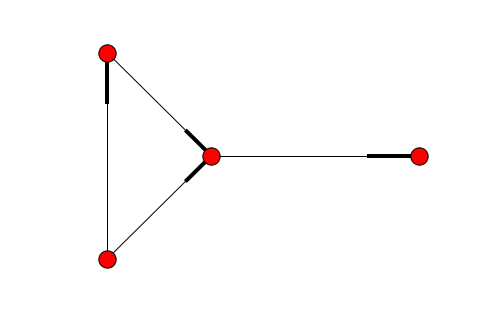

('The graph is directed?: ', True)
('Number of edges: ', 4)
('Number of nodes: ', 4)


In [49]:
gr2 = nx.DiGraph()
for i in range(1,5):
    gr2.add_node(i)
for i in edges:
    gr2.add_edge(i[0], i[1])

nx.draw_spectral(gr2)

plt.show()

print ('The graph is directed?: ', nx.is_directed(gr2))
if nx.is_directed(gr2) is True:
    print ('Number of edges: ', gr2.number_of_edges())
else:
    print ('Number of edges: ', gr2.number_of_edges()*2)

print ('Number of nodes: ', gr2.number_of_nodes())

### Propio

In [59]:
Directed=False
print ('The graph is directed?: ', Directed)

if Directed is True:
    print ('Number of edges: ', len(edges))
else:
    print ('Number of edges: ', 2*len(edges))

temp = []
for i in edges:
    temp.append(i[0])
    temp.append(i[1])
temp = np.array(temp)

print ('Number of nodes: ', np.size(np.unique(temp)))


('The graph is directed?: ', False)
('Number of edges: ', 8)
('Number of nodes: ', 4)


In [60]:
Directed=True
print ('The graph is directed?: ', Directed)

if Directed is True:
    print ('Number of edges: ', len(edges))
else:
    print ('Number of edges: ', 2*len(edges))

temp = []
for i in edges:
    temp.append(i[0])
    temp.append(i[1])
temp = np.array(temp)

print ('Number of nodes: ', np.size(np.unique(temp)))


('The graph is directed?: ', True)
('Number of edges: ', 4)
('Number of nodes: ', 4)


In [112]:
del temp, Directed, edges

NameError: name 'temp' is not defined

## Ejercicio - Matriz de Adyacencia

(resuelva en código propio y usando la librería NetworkX (python) o iGraph (R))

Cree la matriz de adyacencia del grafo del ejercicio anterior (para dirigido y no-dirigido)

### Usando Librería

In [67]:
A = nx.adjacency_matrix(gr)
print ('No Dirigida')
print(A)

No Dirigida
  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1


In [68]:
A = nx.adjacency_matrix(gr2)
print ('Dirigida')
print(A)

Dirigida
  (0, 1)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1


### Propia

In [89]:
def adjmat(ed, directed):
    if directed is True:
        temp_d1 = []
        temp_d2 = []
        for i in ed:
            temp_d1.append(i[0])
            temp_d2.append(i[1])
        B=sc.sparse.csr_matrix((np.ones(len(temp_d1), dtype='int'), (temp_d1, temp_d2)))
    else:
        temp_d1 = []
        temp_d2 = []
        for i in ed:
            temp_d1.append(i[0])
            temp_d1.append(i[1])
            temp_d2.append(i[1])
            temp_d2.append(i[0])
        B=sc.sparse.csr_matrix((np.ones(len(temp_d1), dtype='int'), (temp_d1, temp_d2)))
    return B

In [91]:
A2 = adjmat(edges, True)
print ('Dirigida')
print (A2)

Dirigida
  (1, 2)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1


In [92]:
A2 = adjmat(edges, False)
print ('No Dirigida')
print (A2)

No Dirigida
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 1)	1
  (3, 2)	1
  (4, 2)	1


In [ ]:
del A, A2, gr, gr2

## Ejercicio - Sparseness 


### Enron email network  - Directed  http://snap.stanford.edu/data/email-Enron.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [93]:
F = open("Email-Enron.txt",'r')
Net1=nx.read_edgelist(F)
F.close()

In [99]:
n = Net1.number_of_nodes()
posibles = Net1.number_of_nodes()*(Net1.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net1.number_of_edges()/posibles)

('Ratio: ', 0.00027309755503535)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [100]:
ANet1 = nx.adjacency_matrix(Net1)

In [105]:
nzeros=Net1.number_of_nodes()*Net1.number_of_nodes()-len(ANet1.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 1345935202, ' ceros')


In [113]:
del Net1, n, posibles, ANet1, nzeros

###  Social circles from Facebook (anonymized) - Undirected http://snap.stanford.edu/data/egonets-Facebook.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [106]:
F = open("facebook_combined.txt",'r')
Net=nx.read_edgelist(F)
F.close()

In [107]:
n = Net.number_of_nodes()
posibles = Net.number_of_nodes()*(Net.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net.number_of_edges()/posibles)

('Ratio: ', 0.010819963503439287)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [109]:
ANet = nx.adjacency_matrix(Net)

In [110]:
nzeros=Net.number_of_nodes()*Net.number_of_nodes()-len(ANet.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 16137053, ' ceros')


In [115]:
del Net, n, posibles, ANet, nzeros

###   Webgraph from the Google programming contest, 2002 - Directed   http://snap.stanford.edu/data/web-Google.html

Calcule la proporción entre número de links existentes  contra el número de links posibles.

In [116]:
F = open("web-Google.txt",'r')
Net=nx.read_edgelist(F)
F.close()

In [117]:
n = Net.number_of_nodes()
posibles = Net.number_of_nodes()*(Net.number_of_nodes()-1.0)/2.0
print ('Ratio: ', Net.number_of_edges()/posibles)

('Ratio: ', 1.1271891119695635e-05)


En la matriz de adyacencia de cada uno de las redes elegidas, cuantos ceros hay?

In [118]:
ANet = nx.adjacency_matrix(Net)

In [119]:
nzeros=Net.number_of_nodes()*Net.number_of_nodes()-len(ANet.data)
print ('La Red tiene: ', nzeros, ' ceros')

('La Red tiene: ', 766864614267, ' ceros')


In [120]:
del Net, n, posibles, ANet, nzeros

## Ejercicio - Redes Bipartitas¶ 
Cree un grafo de 5 nodos con 5 enlaces. Elija dos nodos cualquiera e imprima:

    5 Paths diferentes entre los nodos
    El camino mas corto entre los nodos
    El diámetro de la red
    Un self-avoiding path
